In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [185]:
# Load the data
data = pd.read_csv('results.csv',  names=['test case name', 'platform', 'data set size', 'number of repetitions', 'number of repetitions skipped', 'index of repetition', 'total execution time'])

# Display the first few rows of the dataframe
print(data.head())


  test case name     platform  data set size  number of repetitions  \
0     continents  expressions          10000                     10   
1     continents  expressions          10000                     10   
2     continents  expressions          10000                     10   
3     continents  expressions          10000                     10   
4     continents  expressions          10000                     10   

   number of repetitions skipped  index of repetition  total execution time  
0                              1                   -1              0.111841  
1                              1                    0              0.025321  
2                              1                    1              0.024941  
3                              1                    2              0.025037  
4                              1                    3              0.025013  


In [186]:
# Check data types
print(data.dtypes)

test case name                    object
platform                          object
data set size                      int64
number of repetitions              int64
number of repetitions skipped      int64
index of repetition                int64
total execution time             float64
dtype: object


In [187]:

# Filter out warm up repetitions
data = data[data["index of repetition"] >= 0]

# Calculate the mean and standard deviation of the total execution time for each test case
aggregate_data = data.groupby(['test case name','platform', 'data set size']).aggregate(
    mean_execution_time=('total execution time', 'mean'),
    std_deviation=('total execution time', 'std'),
    count=('total execution time', 'count')
).reset_index()

# Check the aggregated data

print(aggregate_data.head())

  test case name           platform  data set size  mean_execution_time  \
0     continents        expressions          10000             0.024791   
1     continents        expressions         100000             0.243883   
2     continents        expressions        1000000             2.373286   
3     continents        expressions       10000000            24.142718   
4     continents  greatexpectations          10000             0.007251   

   std_deviation  count  
0       0.000283     10  
1       0.002497     10  
2       0.021965     10  
3       0.167391     10  
4       0.000132     10  


In [188]:
import os

os.makedirs('plots', exist_ok=True)
def save_plot(plot, file_name):
    path = os.path.join('plots', file_name) + '.png'
    plot.savefig(path, dpi=300,  bbox_inches='tight')

/var/folders/7n/9pr1nk311yb_s9yqf3yjh_500000gp/T/ipykernel_40142/657077126.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(data.dataset_label)


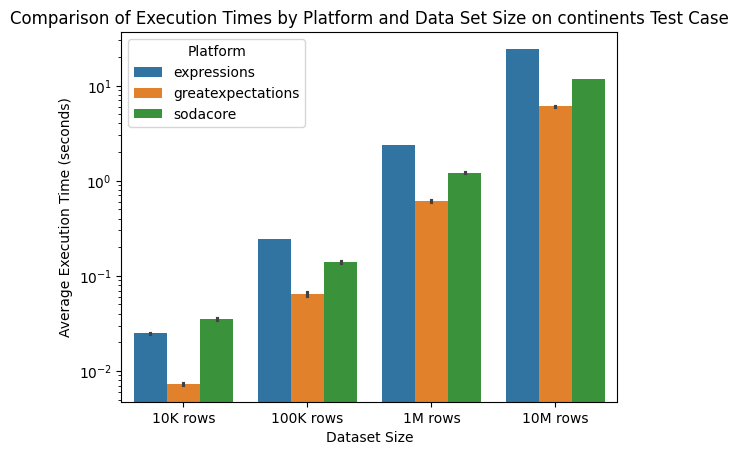

/var/folders/7n/9pr1nk311yb_s9yqf3yjh_500000gp/T/ipykernel_40142/657077126.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(data.dataset_label)


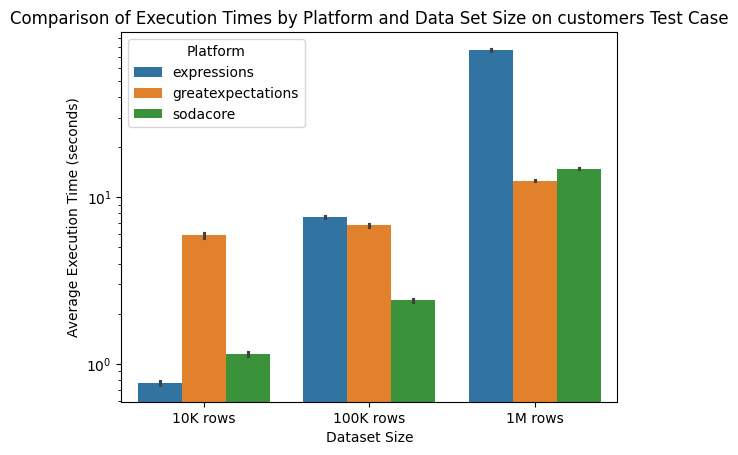

In [189]:
# Create bar plot with 95% confidence intervals

# pretty print the dataset size
def pretty_print_dataset_size(s):
    # convert 1000 to 1K etc.
    return str(s)[::-1].replace('000000', 'M').replace('000', 'K')[::-1] + ' rows'
    
aggregate_data['dataset_label'] = aggregate_data['data set size'].apply(lambda x: pretty_print_dataset_size(x))


# workaround for seaborn not supporting error bars on bar plots
def barplot_err(x, y, xerr=None, yerr=None, data=None, **kwargs):

    _data = []
    for _i in data.index:

        _data_i = pd.concat([data.loc[_i:_i]]*3, ignore_index=True, sort=False)
        _row = data.loc[_i]
        if xerr is not None:
            _data_i[x] = [_row[x]-_row[xerr], _row[x], _row[x]+_row[xerr]]
        if yerr is not None:
            _data_i[y] = [_row[y]-_row[yerr], _row[y], _row[y]+_row[yerr]]
        _data.append(_data_i)
    

    _data = pd.concat(_data, ignore_index=True, sort=False)

    _ax = sns.barplot(x=x,y=y,data=_data, errorbar=('ci', 95), **kwargs)

    return _ax


# Plot the data

test_cases = [ 
              'continents', 
              'customers' 
              ]

# Create a plot for each dataset size
for case in test_cases:
    data = aggregate_data[aggregate_data['test case name'] == case]
    plt.plot(figsize=(14,10))
    chart = barplot_err(x="data set size", y="mean_execution_time", yerr="std_deviation", hue="platform", 
    data=data, ax=plt.gca())
    chart.set_xticklabels(data.dataset_label)

    plt.yscale('log')
    plt.title('Comparison of Execution Times by Platform and Data Set Size on ' + case + ' Test Case')
    plt.xlabel('Dataset Size')
    plt.ylabel('Average Execution Time (seconds)')
    plt.legend(title='Platform')
    save_plot(plt, 'execution_time_comparison_' + case)
    plt.show()

/var/folders/7n/9pr1nk311yb_s9yqf3yjh_500000gp/T/ipykernel_40142/2133680144.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['relative_speedup'] = plot_data.apply(lambda x: calculate_relative_speedup(x, base_times), axis=1)
/var/folders/7n/9pr1nk311yb_s9yqf3yjh_500000gp/T/ipykernel_40142/2133680144.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(plot_data.dataset_label)


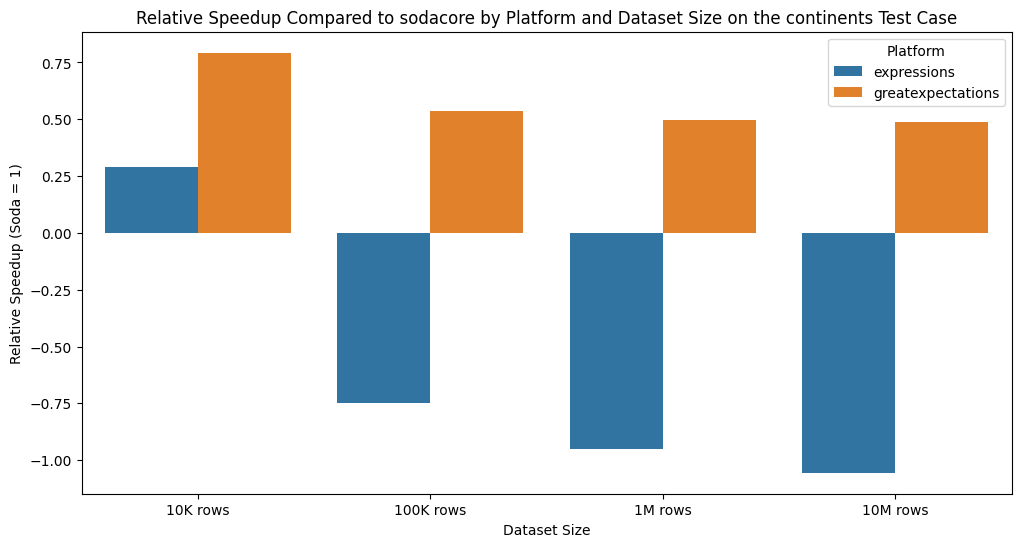

/var/folders/7n/9pr1nk311yb_s9yqf3yjh_500000gp/T/ipykernel_40142/2133680144.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['relative_speedup'] = plot_data.apply(lambda x: calculate_relative_speedup(x, base_times), axis=1)
/var/folders/7n/9pr1nk311yb_s9yqf3yjh_500000gp/T/ipykernel_40142/2133680144.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(plot_data.dataset_label)


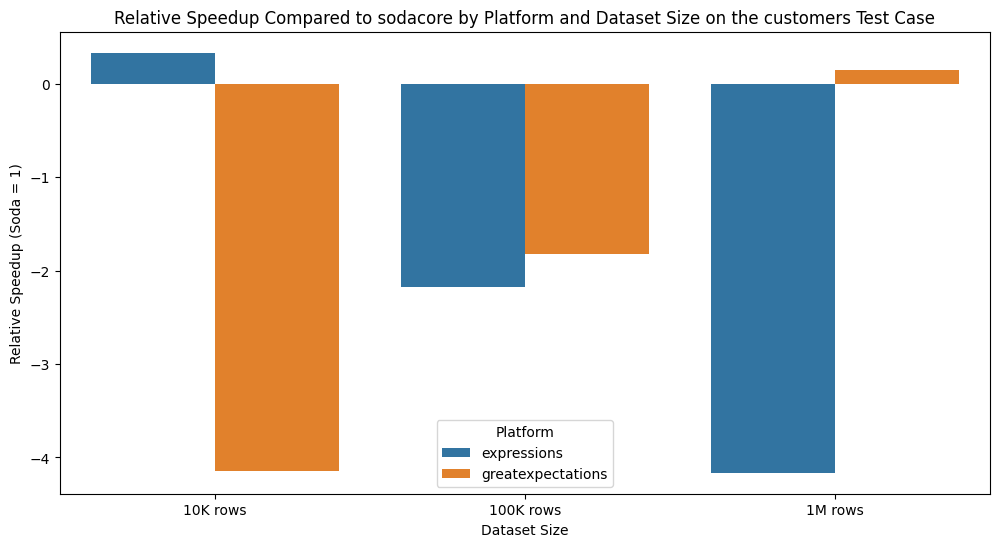

In [190]:
def calculate_relative_speedup(row, base_times):
    if row['data set size'] in base_times:
        # Calculate as inverse of the ratio, subtract from 1 to switch signs
        return 1 - (row['mean_execution_time'] / base_times[row['data set size']])
    else:
        return np.nan  # Handle missing 'sodacore' data safely


base_platform = 'sodacore'
test_cases = [ 'continents', 'customers' ]

# Create a plot for each dataset size
for case in test_cases:
        
    plot_data = aggregate_data[aggregate_data['test case name'] == case]
        
    # Calculate the mean execution time for 'soda' for each data set size
    base_times = plot_data[plot_data['platform'] == base_platform].set_index('data set size')['mean_execution_time']

    # Calculate relative speedup (soda time / other platform time)
    plot_data['relative_speedup'] = plot_data.apply(lambda x: calculate_relative_speedup(x, base_times), axis=1)
    # Remove soda data from the DataFrame for plotting

    plot_data = plot_data[plot_data['platform'] != base_platform]
   
    
    plt.figure(figsize=(12, 6))
    chart = sns.barplot(data=plot_data, x='data set size', y='relative_speedup', hue='platform')
    plt.title(f"Relative Speedup Compared to {base_platform} by Platform and Dataset Size on the {case} Test Case")
    plt.ylabel('Relative Speedup (Soda = 1)')
    plt.xlabel('Dataset Size')
    chart.set_xticklabels(plot_data.dataset_label)  
    plt.legend(title='Platform')
    save_plot(plt, 'relative_speedup_comparison_' + case)
    plt.show()


